# Airline Fleet Performance & Maintenance Analytics

### Data Visualization

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sns.set_theme(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 5)

df = pd.read_csv("Fleet.csv")
current_year = pd.Timestamp.today().year

##### Classify Aircraft by Age Group

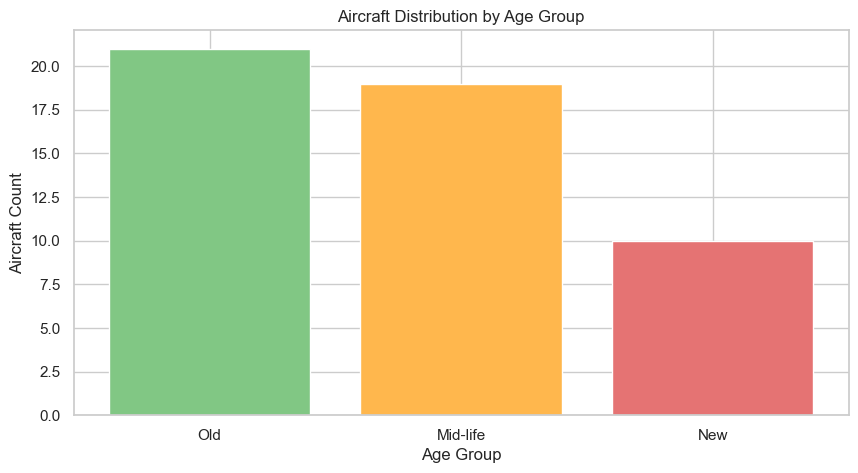

In [5]:
df["Age_Group"] = pd.cut(
    current_year - df["Year_Built"],
    bins=[0, 9, 20, 100],
    labels=["New", "Mid-life", "Old"]
)

age_counts = df["Age_Group"].value_counts()

plt.figure()
plt.bar(age_counts.index, age_counts.values,
        color=["#81C784", "#FFB74D", "#E57373"])
plt.title("Aircraft Distribution by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Aircraft Count")
plt.show()


##### Spare Part Demand by Age Group (Active Fleet)

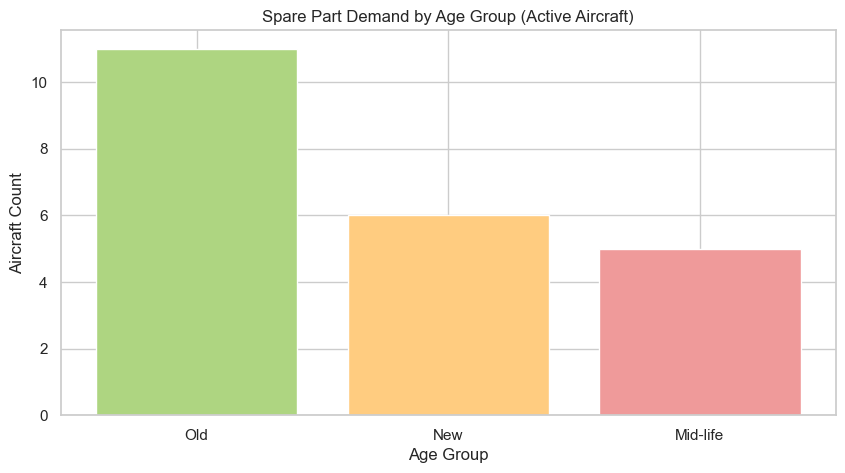

In [6]:
active_age = df[df["Status"] == "Active"]["Age_Group"].value_counts()

plt.figure()
plt.bar(active_age.index, active_age.values,
        color=["#AED581", "#FFCC80", "#EF9A9A"])
plt.title("Spare Part Demand by Age Group (Active Aircraft)")
plt.xlabel("Age Group")
plt.ylabel("Aircraft Count")
plt.show()


##### Fleet Standardization (Complexity Index)

In [7]:
fleet = df.groupby("Airline").agg(
    Total_Aircraft=("Registration_ID", "count"),
    Unique_Models=("Aircraft_Model", "nunique")
)

fleet["Aircraft_Per_Model"] = fleet["Total_Aircraft"] / fleet["Unique_Models"]
fleet = fleet.sort_values("Aircraft_Per_Model")


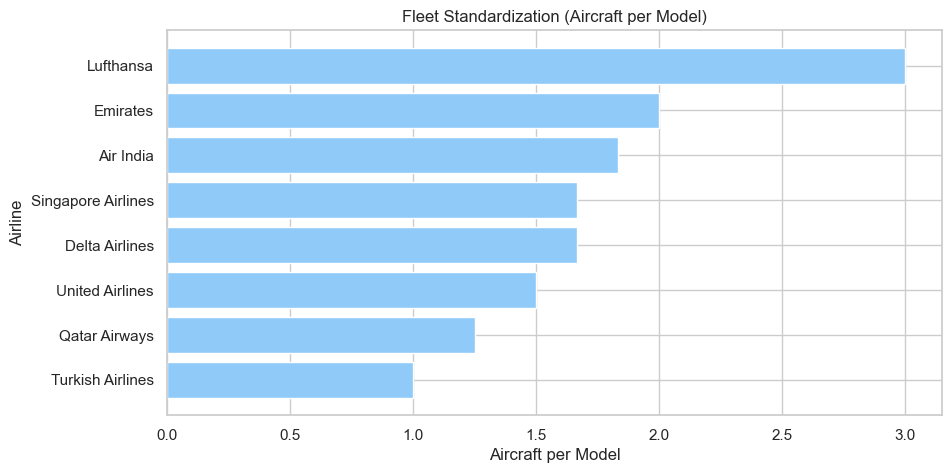

In [8]:
plt.figure()
plt.barh(fleet.index, fleet["Aircraft_Per_Model"], color="#90CAF9")
plt.title("Fleet Standardization (Aircraft per Model)")
plt.xlabel("Aircraft per Model")
plt.ylabel("Airline")
plt.show()


##### Aircraft Retirement Forecast

In [9]:
df["Retirement_Risk"] = pd.cut(
    current_year - df["Year_Built"],
    bins=[0, 19, 25, 100],
    labels=["Healthy", "Near Retirement", "Immediate Retirement"]
)

risk_counts = df["Retirement_Risk"].value_counts()


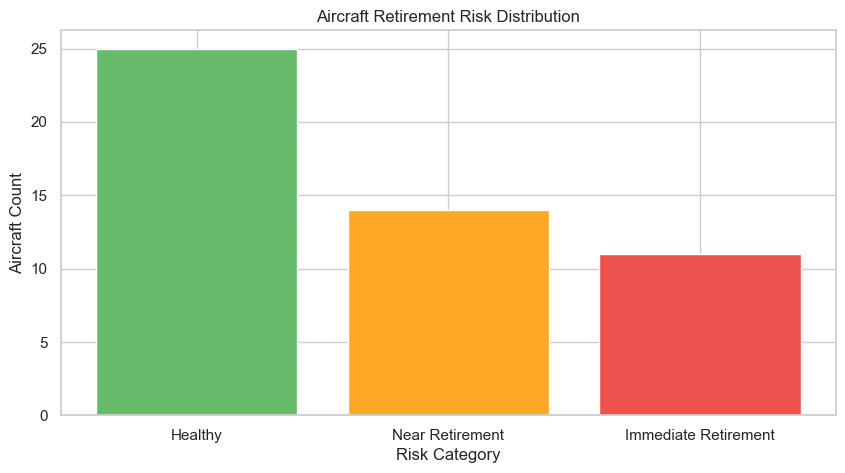

In [13]:
plt.figure()
plt.bar(risk_counts.index, risk_counts.values,
        color=["#66BB6A", "#FFA726", "#EF5350"])
plt.title("Aircraft Retirement Risk Distribution")
plt.xlabel("Risk Category")
plt.ylabel("Aircraft Count")
plt.show()


##### Engine Reliability Risk

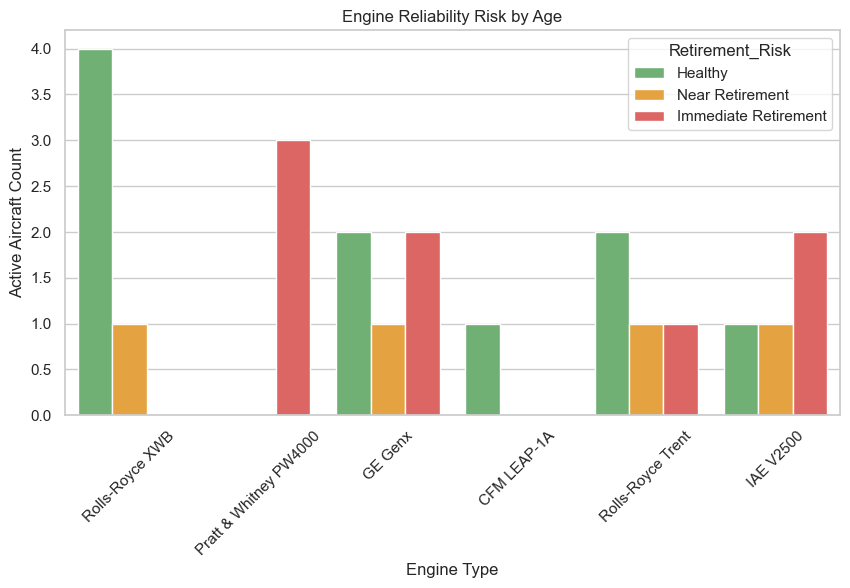

In [16]:
sns.countplot(
    data=df[df["Status"] == "Active"],
    x="Engine_Type",
    hue="Retirement_Risk",
    palette=["#66BB6A", "#FFA726", "#EF5350"]
)
plt.title("Engine Reliability Risk by Age")
plt.xlabel("Engine Type")
plt.ylabel("Active Aircraft Count")
plt.xticks(rotation=45)
plt.show()


##### Engine Type & Spare Part Planning

C:\Users\monik\AppData\Local\Temp\ipykernel_19652\820962805.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


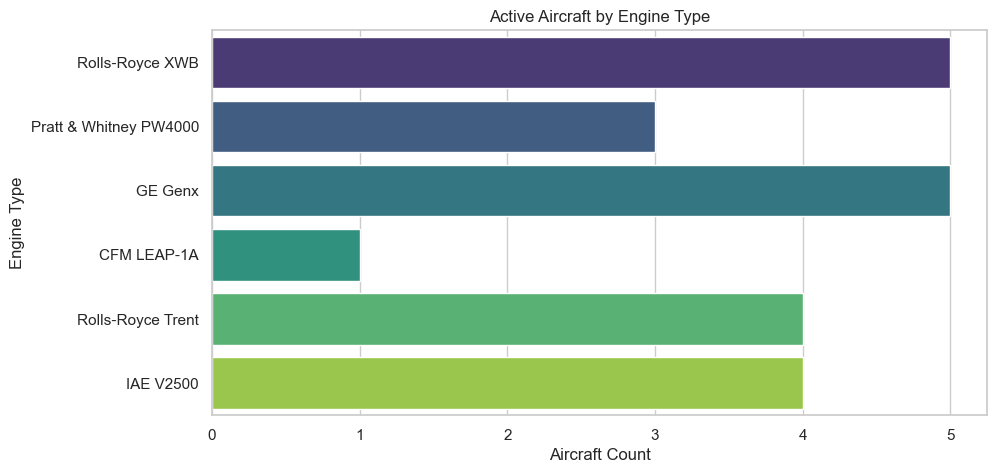

In [19]:
sns.countplot(
    data=df[df["Status"] == "Active"],
    y="Engine_Type",
    palette="viridis"
)
plt.title("Active Aircraft by Engine Type")
plt.xlabel("Aircraft Count")
plt.ylabel("Engine Type")
plt.show()


##### Engine Type vs Fuel Burn

In [20]:
engine_fuel = (
    df[df["Status"] == "Active"]
    .groupby("Engine_Type")["Fuel_Burn_L_hr"]
    .mean()
    .sort_values()
)


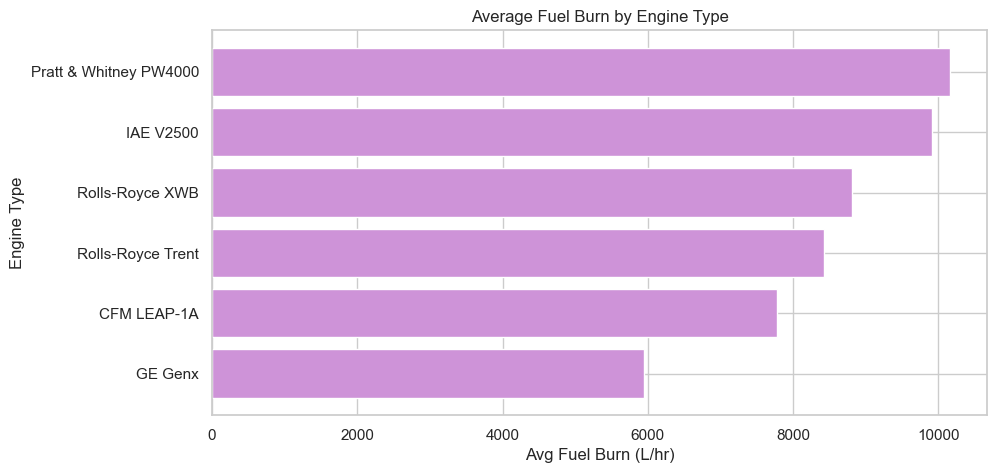

In [21]:
plt.figure()
plt.barh(engine_fuel.index, engine_fuel.values, color="#CE93D8")
plt.title("Average Fuel Burn by Engine Type")
plt.xlabel("Avg Fuel Burn (L/hr)")
plt.ylabel("Engine Type")
plt.show()


##### Transitioning Fleet Models (Active vs Retired)

In [23]:
transition = (
    df.groupby(["Aircraft_Model", "Status"])
    .size()
    .unstack(fill_value=0)
)


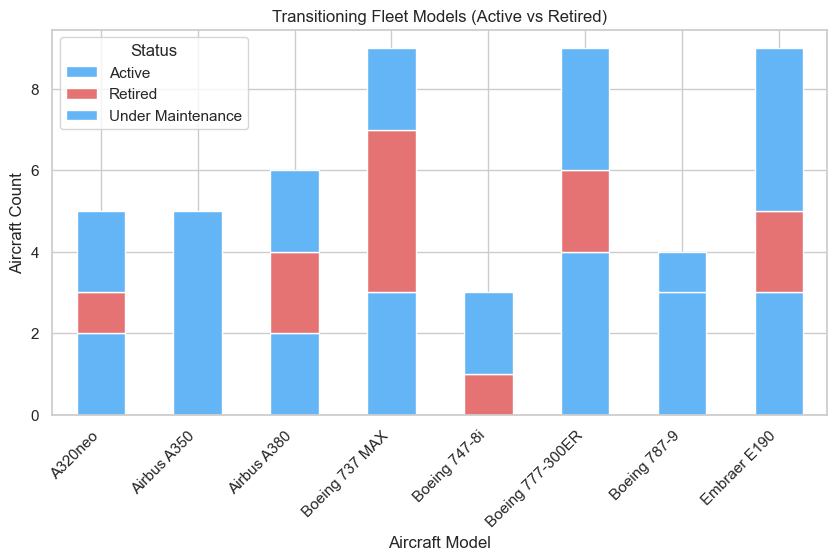

In [24]:
transition.plot(
    kind="bar",
    stacked=True,
    color=["#64B5F6", "#E57373"]
)
plt.title("Transitioning Fleet Models (Active vs Retired)")
plt.xlabel("Aircraft Model")
plt.ylabel("Aircraft Count")
plt.xticks(rotation=45, ha="right")
plt.show()


##### Fuel Inefficiency & Maintenance Demand

In [25]:
fuel_ineff = (
    df[df["Status"] == "Active"]
    .groupby("Aircraft_Model")["Fuel_Burn_L_hr"]
    .mean()
    .sort_values(ascending=False)
    .head(10)
)


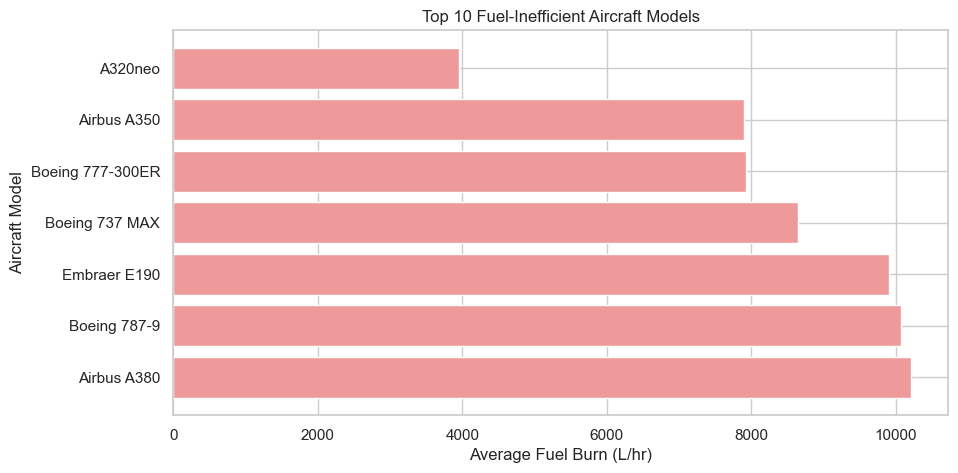

In [26]:
plt.figure()
plt.barh(fuel_ineff.index, fuel_ineff.values, color="#EF9A9A")
plt.title("Top 10 Fuel-Inefficient Aircraft Models")
plt.xlabel("Average Fuel Burn (L/hr)")
plt.ylabel("Aircraft Model")
plt.show()
